<a href="https://colab.research.google.com/github/GiacomoDiFa/Progetto-MN/blob/main/progetto_MN_Di_Fabrizio_Montanari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import scipy.integrate

Compile the following notebook and share a link with me sending and e-mail to giovanni.stabile@uniurb.it at least one week before the oral examination. All the implemented function will have to be properly documented and commented.

Compile The following Cell with your information. In case it is a group project, put the info for all the group members

Name1: Giacomo \
Surname1: Di Fabrizio\
Email1: 

Name2: Matteo Marco\
Surname2: Montanari\
Email2: 

Consider the following one-dimensional PDE:
$$
-u_{xx}(x) = f(x)\quad\mathrm{ in }\ \Omega = (0, \pi)
$$
$$
u(x) = 0, \quad\mathrm{ on }\ \partial\Omega = \{0, \pi\}
$$

Given the following $4^{th}$ order finite difference approximation of the second order derivative:

$$u_{xx}(x_i) = \frac{-u_{i-2}+16u_{i-1}-30u_i+16u_{i+1}-u_{i+2}}{12h^2}$$

Implement a function that given the domain interval, the forcing function, the number of discretization points, the boundary conditions, returns the matrix $A$ and the the right hand side $b$.

# Mathematical Background

The physical interpretation of this problem is related to the modelling of an elastic string, which occupies at rest the space $[0, \pi]$ and is fixed at the two extremes. The unknown $u(x)$ represents the displacement of the string at the point $x$, and the right-hand side models a prescribed force $f(x)$ on the string.

For the numerical discretization of the problem, we consider a **Finite Difference (FD) Approximation**. Let $n$ be an integer, a consider a uniform subdivision of the interval $(0,\pi)$ using $n$ equispaced points, denoted by $\{x_i\}_{i=0}^n$ . Moreover, let $u_i$ be the FD approximation of $u(x_i)$, and similarly $f_i \approx f(x_i)$.

In order to formulate the discrete problem, we consider a FD approximation of the left-hand side, as follows ($4^{th}$ order finite difference approximation of the second order derivative):

$$u_{xx}(x_i) = \frac{-u_{i-2}+16u_{i-1}-30u_i+16u_{i+1}-u_{i+2}}{12h^2} \qquad \text{for} \qquad  i = 2, ..., n-2$$

while we use the $2^{th}$ order finite difference approximation of the second order derivative for the remaining points $(i = 1, n-1)$:

$$
-u_{xx}(x_i) \approx \frac{-u_{i-1} + 2u_i - u_{i+1}}{h^2} \qquad \text{for} \qquad  i = 1, n-1
$$

being $h = \frac{1}{n-1}$ the size of each subinterval $(x_i, x_{i+1})$.

Finally the problem that we need to solve is $(P) =$

$$
u_i = 0 \qquad\qquad\qquad\qquad\qquad i=0
$$

$$
\frac{-u_{i-1} + 2u_i - u_{i+1}}{h^2} = f_i \qquad\qquad i=1
$$

$$
\frac{-u_{i-2}+16u_{i-1}-30u_i+16u_{i+1}-u_{i+2}}{12h^2} = - f_i \qquad i=2, \ldots, n-2
$$

$$
\frac{-u_{i-1} + 2u_i - u_{i+1}}{h^2} = f_i \qquad\qquad i=n-1
$$

$$
u_i = 0 \qquad\qquad\qquad\qquad\qquad i=n
$$

Then, let us collect al the unknowns $\{u_i\}_{i=0}^n$ in a vector $\mathbf{u}$. Then, (P) is a linear system
$$
A \mathbf{u} = \mathbf{f}
$$

then $A$ is the matrix:

\begin{bmatrix}
1  & 0  & 0  & 0 & 0 & 0 & 0 & 0 & 0\\
-1/h^2 & +2/h^2 & -1/h^2 & 0 & 0 & ... & ... & ... & 0\\
-1/12h^2 & +16/12h^2 & -30/12h^2 & +16/12h^2 & -1/12h^2 & 0 & ... & ... & 0\\
0 & -1/12h^2 & +16/12h^2 & -30/12h^2 & +16/12h^2 & -1/12h^2 & 0 & ... & 0\\
0 & 0 & -1/12h^2 & +16/12h^2 & -30/12h^2 & +16/12h^2 & -1/12h^2 & 0 & 0\\
0 & ... & 0 & ... & ... & ... & ... & ... & 0 \\
0 & ... & ... & 0 & -1/12h^2 & +16/12h^2 & -30/12h^2 & +16/12h^2 & -1/12h^2\\
0 & ... & ... & ... & 0 & 0 & -1/h^2 & +2/h^2 & -1/h^2\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1\\
\end{bmatrix}

In [2]:
# 4th order finite difference scheme
def finDif(omega, f, n, bc):
    
    assert n > 4, "n must be greater than 4!"
    assert omega[0] < omega[1], "Discretization interval is not correct!" 
    
    # d(x, y) = | x - y |
    h = np.abs(omega[0] - omega[1]) / (n - 1)
        
    x = np.linspace(0, 1, n)    
    
    # 4th order approximation term
    termine_noto = -f(x)
    # 2th order approximation term
    termine_noto[1] = f(x[1])
    termine_noto[-2] = f(x[-2])
    # boundary conditions
    termine_noto[0] = bc[0]
    termine_noto[-1] = bc[1]

    # create discretization matrix A
    A = np.zeros((n, n))
  
    a = -np.ones((n-2, )) 
    b = 16*np.ones((n-1, ))
    c = -30*np.ones((n, ))

    A = (np.diag(a, -2) + np.diag(a, +2) + np.diag(b, -1) + np.diag(b, +1) + np.diag(c, 0))

    A /= (12*h**2)
    
    A[0, :] = np.zeros(n)
    A[1, :] = np.zeros(n)

    A[n-1, :] = np.zeros(n)
    A[n-2, :] = np.zeros(n)

    A_second_row = np.array([-1.0, 2.0, -1.0]) / (h**2)
    A_second_last_row = np.array([-1.0, 2.0, -1.0]) / (h**2)
    
    A[1, 0:3] = A_second_row
    A[n-2, n-3:n] = A_second_last_row
  
    A[0, 0] = 1
    A[-1, -1] = 1

    return A, termine_noto

In [3]:
omega = [0, np.pi]
f = lambda x : np.sin(x)
n = 6
bc = [0, 0]
A, b = finDif(omega, f, n, bc)
print("A =")
print(A)

A =
[[ 1.          0.          0.          0.          0.          0.        ]
 [-2.53302959  5.06605918 -2.53302959  0.          0.          0.        ]
 [-0.2110858   3.37737279 -6.33257398  3.37737279 -0.2110858   0.        ]
 [ 0.         -0.2110858   3.37737279 -6.33257398  3.37737279 -0.2110858 ]
 [ 0.          0.          0.         -2.53302959  5.06605918 -2.53302959]
 [ 0.          0.          0.          0.          0.          1.        ]]


Implement two functions that compute the LU and the Cholesky factorization of the system matrix $A$

In [4]:
# LU factorization of matrix A
def LU(A):
    A = A.copy()
    N=len(A)
    for k in range(N-1):
        if (abs(A[k,k]) < 1e-15):
            raise RuntimeError("Null pivot")
            
        A[k+1:N,k] /= A[k,k]
        for j in range(k+1,N):
            A[k+1:N,j] -= A[k+1:N,k]*A[k,j]
    
    L=np.tril(A)
    for i in range(N):
        L[i,i]=1.0
    U = np.triu(A)
    return L, U

In [5]:
# cholesky factorization
def cholesky(A):
    A = A.copy()
    N = len(A)
    for k in range(N-1):
        A[k,k] = np.sqrt(A[k,k])
        A[k+1:N,k] = A[k+1:N,k]/A[k,k]
        
        for j in range(k+1,N):
            A[j:N,j] = A[j:N,j] - A[j:N,k]*A[j,k]
        
    A[-1,-1] = np.sqrt(A[-1,-1])
    L=np.tril(A)
    return L, L.transpose()

Implement forward and backward substitution functions to exploit the developed factorization methods to solve the derived linear system of equations.

In [6]:
# forward substitution
def L_solve(L,rhs):
    x = np.zeros_like(rhs)
    N = len(L)
        
    x[0] = rhs[0]/L[0,0]
    
    for i in range(1,N):
        x[i] = (rhs[i] - np.dot(L[i, 0:i], x[0:i]))/L[i,i]
    
    return x

In [7]:
# backward substitution
def U_solve(U,rhs):
    x = np.zeros_like(rhs)
    N = len(U)
              
    x[-1] = rhs[-1]/U[-1,-1]
    
    for i in reversed(range(N-1)):
        x[i] = (rhs[i] -np.dot(U[i, i+1:N], x[i+1:N]))/U[i,i]
    
    return x

Solve the derived linear system using the implemented functions and plot the computed solution:

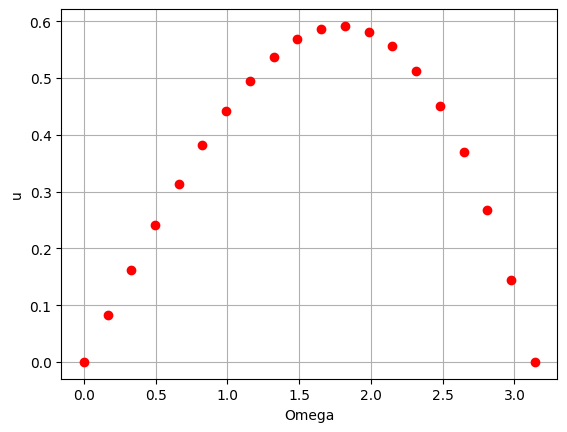

In [8]:
omega = [0, np.pi]
f = lambda x : np.sin(x)
n = 20
bc = [0, 0]

A, b = finDif(omega, f, n, bc)
L, U = LU(A)
w = L_solve(L, b)
u = U_solve(U, w)

x = np.linspace(0, np.pi, n)
plt.plot(x, u, 'ro')
plt.xlabel('Omega')
plt.ylabel('u')
plt.grid()

Considering the new domain $\Omega = (0,1)$ and the forcing term $f(x) = x(1-x)$ with B.C. $u(x) = 0$, on $\partial \Omega = \{0,1\}$ produce a plot and a table where you show the decay of the error w.r.t. the number of grid points.
(The analytical solution for the above problems is $u_{an} = \frac{x^4}{12} - \frac{x^3}{6} + \frac{x}{12}$)

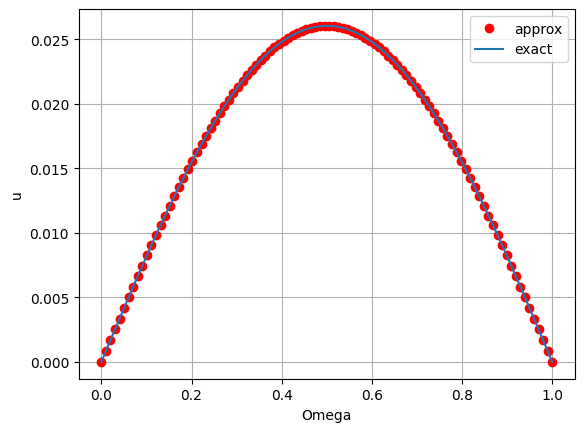

In [9]:
omega_new = [0, 1]
n_new = 100
x_new = np.linspace(0, 1, n_new)
f_new = lambda x_new : x_new*(1 - x_new)
bc_new = [0, 0]
A_new, b_new = finDif(omega_new, f_new, n_new, bc_new)
A1_new = A_new.copy()
u_new = np.linalg.solve(A1_new, b_new) 

u_ex = (x_new**4)/12.0 - (x_new**3)/6.0 + x_new/12.0

# Plot the FD and exact solution
plt.plot(x_new, u_new, 'ro', label='approx')
plt.plot(x_new, u_ex, label='exact')
plt.xlabel('Omega')
plt.ylabel('u')
plt.legend()
plt.grid()

In [10]:
# table where you show the decay of the error w.r.t. the number of grid points
print(np.linalg.norm(u_ex - u_new, 2))

1.9905417310394783e-08


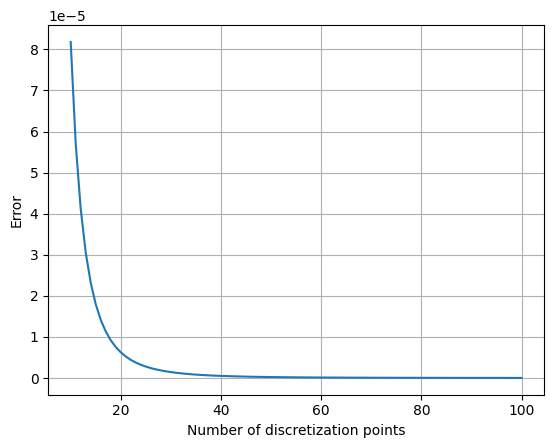

In [11]:
omega_new = [0, 1]
bc_new = [0, 0]

error = []
n_points = np.array([x for x in range(10, 101)])

for j in n_points:
    x_new = np.linspace(0, 1, j)
    f_new = lambda x_new : x_new*(1 - x_new)
    u_ex = (x_new**4)/12.0 - (x_new**3)/6.0 + x_new/12.0

    A_new, b_new = finDif(omega_new, f_new, j, bc_new)
    A1_new = A_new.copy()
    u_new = np.linalg.solve(A1_new, b_new) 
    
    error.append(np.linalg.norm(u_ex - u_new, 2))
    
plt.plot(n_points, error)
plt.xlabel('Number of discretization points')
plt.ylabel('Error')
plt.grid()

In [12]:
# NB python dictionaries
tab = {n : e for n, e in zip(n_points, error)}
tab

{10: 8.182104913849225e-05,
 11: 5.706190043777708e-05,
 12: 4.115278746829856e-05,
 13: 3.051750491708503e-05,
 14: 2.3168609617246354e-05,
 15: 1.7946045414151817e-05,
 16: 1.4144027486156257e-05,
 17: 1.1317631361057197e-05,
 18: 9.177619391578304e-06,
 19: 7.5308382678810345e-06,
 20: 6.2452039891759625e-06,
 21: 5.2284696168144255e-06,
 22: 4.4149840113946926e-06,
 23: 3.757224437859193e-06,
 24: 3.2202585849810886e-06,
 25: 2.778048103188456e-06,
 26: 2.4109352684829296e-06,
 27: 2.1039050656594176e-06,
 28: 1.8453647937521708e-06,
 29: 1.6262747785589246e-06,
 30: 1.4395210936619862e-06,
 31: 1.2794573244936942e-06,
 32: 1.1415661472512682e-06,
 33: 1.02220659077801e-06,
 34: 9.184236512359627e-07,
 35: 8.278033812434153e-07,
 36: 7.483617302630032e-07,
 37: 6.784586031810024e-07,
 38: 6.167308304879536e-07,
 39: 5.620396296155551e-07,
 40: 5.134289901314642e-07,
 41: 4.7009270690330147e-07,
 42: 4.313478956282996e-07,
 43: 3.9661375274939795e-07,
 44: 3.6539433808174925e-07,
 4

Exploit the derived LU factorizations to compute the determinant of the system's matrix $A$ using the original problem formulation.

In [13]:
def determinant(A):
    L, U = LU(A)
    size = A.shape[0]
    determinant = 1
    
    for i in range(size):
        determinant *= U[i, i]

    return determinant

omega_new = [0, 1]
n_new = 20
x_new = np.linspace(0, 1, n_new)
f_new = lambda x_new : x_new*(1 - x_new)
bc_new = [0, 0]
A_new, b_new = finDif(omega_new, f_new, n_new, bc_new)

print(determinant(A_new))
print(np.linalg.det(A_new))

2.2467218050587637e+48
2.2467218050586745e+48


In [14]:
def condNumb(A):
    condNu = np.linalg.cond(A)
    return condNu

condNumb(A_new)
# forse si deve fare diversamente? Boohh che poi il prof si è confuso secondo me perchè chiedeva di calcolare il determinante
# (vedi cella sopra) e non il numero di condizionamento

6033.525045137745

In [15]:
# ho trovato questa formula ma mi sa che non fa
def condNum(A):
    return np.linalg.norm(A,2) * np.linalg.norm(np.linalg.inv(A),2)

#def condNumWithOurInverse(A):
#  return np.linalg.norm(A,2) * np.linalg.norm(inverseMatrix(A),2)

print(np.linalg.cond(A_new))
print(condNum(A_new))
#print(condNumWithOurInverse(A))

6033.525045137745
6033.525045135221


Implement a preconditioned Conjugant Gradient method to solve the original linear system of equations using an iterative method:

In [16]:
def conjugate_gradient(A, b, P, nmax=len(A), eps=1e-10):
    N=len(A)
    x = np.zeros_like(b)
    tol = eps + 1
    it = 0
    r = b - np.dot(A,x)
    rho_old = 1.
    p_old = np.zeros_like(b)
    while (it < nmax and tol > eps):
        it += 1
        z = np.linalg.solve(P,r)
        rho = np.dot(r,z)
        if (it > 1):
            beta = rho/rho_old
            p = z + beta*p_old
        else:
            p = z
        q = np.dot(A,p)
        alpha = rho/(np.dot(p,q))
        x += p*alpha
        r -= q*alpha
        
        p_old = p
        rho_old = rho
        
        tol = np.linalg.norm(r,2)
        
    print('n iterazioni:\t', it)
    print('Tolleranza:\t', tol)
    return x

n iterazioni:	 20
Tolleranza:	 13.778323639478318
Errore:		 0.6006359763338985


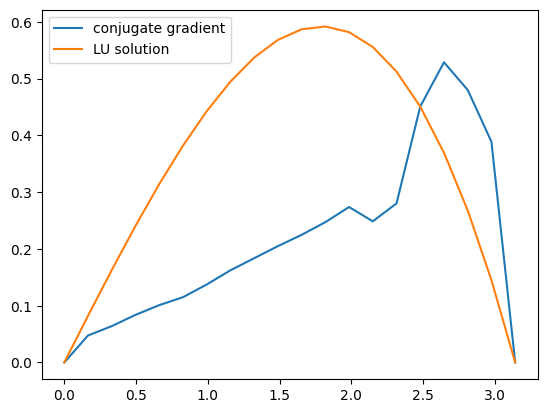

In [17]:
sol_conjugate_gradient = conjugate_gradient(A, b, np.identity(len(A)))
print('Errore:\t\t', np.linalg.norm(sol_conjugate_gradient - u)/np.linalg.norm(u))
#non so se torna, ho copiato i codici paro paro
#forse non torna perchè la matrice fa cagare?
x_newnew = np.linspace(0, np.pi, n)
plt.plot(x_newnew, sol_conjugate_gradient, label='conjugate gradient')
plt.plot(x_newnew, u, label='LU solution')
plt.legend()

Consider the following time dependent variation of the PDE starting from the orginal problem formulation:
$$
u'(t)-u_{xx} = \alpha(t)f(x)
$$

for $t\in [0,T]$, with $\alpha(t) = \cos(t)$ and $T = 6\pi$

Use the same finite difference scheme to derive the semi-discrete formulation and solve it using a forward Euler's method.

Plot the time dependent solution solution at $x = \pi/2$, $x=1$, 
$x=\pi$


In [18]:
#TODO

Given the original $Au = b$ system, implement an algorithm to compute the largest and smallest eigenvalues and the associated eigenvectors of the matrix $A$.

In [19]:
# let's implement Power Method
z0 = np.ones_like(b)

def PM(A, z0, tol=1e-20, nmax=40000):

    z = z0
    
    it = 0
    eps = tol + 1
    while (it < nmax and eps > tol):
        it += 1
        
        q = z / (np.linalg.norm(z))

        if (it == 1):
            l_km1 = q.T @ z
        else:
            l_km1 = l.copy()

        z = A @ q

        l = q.T @ z

        #eps = np.linalg.norm(l_km1 - l) / np.linalg.norm(l)

        # Ax = lx <=> ||Ax - lx||_2 = 0
        eps = np.linalg.norm(A @ q - l * q, 2) 
    
    print("Iterazioni:", it, "\nTolleranza:", eps)

    return l, q

In [20]:
# compute PM
l, x = PM(A, z0)
# use numpy library for comparing    
l_np, x_np = np.linalg.eig(A)

print("l_max =", l, "\nx_max =", x)
print("\nNumpy Linalg")
# autovalore ed autovettore di modulo massimo
print("l_max =", max(abs(l_np)), "\nx_max =", x_np[:, np.argmax(abs(l_np))])
# qua e' strano perche la tolleranza viene bassa ma l'errore mi sembra alto quindi non ha 
# senso ma il codice mi sembra giusto

Iterazioni: 40000 
Tolleranza: 1.2434497875801753e-14
l_max = -186.7652164282855 
x_max = [ 0.         -0.01651192 -0.11733521  0.22675692 -0.30551472  0.34230281
 -0.33209835  0.27630073 -0.18257038  0.06377532  0.06377532 -0.18257038
  0.27630073 -0.33209835  0.34230281 -0.30551472  0.22675692 -0.11733521
 -0.01651192  0.        ]

Numpy Linalg
l_max = 192.97092729708658 
x_max = [ 0.         -0.00820075 -0.05966664  0.12123758 -0.17884896  0.23025749
 -0.27369794  0.30766613 -0.33098653  0.34285205 -0.34285205  0.33098653
 -0.30766613  0.27369794 -0.23025749  0.17884896 -0.12123758  0.05966664
  0.00820075  0.        ]


## chatgpt
Se ottieni risultati diversi utilizzando la libreria NumPy per calcolare gli autovalori e gli autovettori rispetto al tuo metodo delle potenze, potrebbe esserci una differenza nella precisione numerica o nella gestione degli errori tra le due implementazioni.

Il metodo delle potenze è un algoritmo iterativo che può richiedere un numero elevato di iterazioni per convergere alla soluzione desiderata, specialmente se la matrice è malcondizionata o ha autovalori multipli. La precisione numerica e la gestione degli errori possono influire sul comportamento dell'algoritmo e sulla sua capacità di convergere correttamente.

Ecco alcune considerazioni da tenere a mente:

1. Tolleranza: Assicurati di aver impostato una tolleranza adeguata per il tuo metodo delle potenze e per il confronto dei risultati. Se la tolleranza è troppo bassa, potrebbe essere necessario un numero maggiore di iterazioni per raggiungere la convergenza. D'altra parte, se la tolleranza è troppo alta, potresti ottenere risultati meno accurati.

2. Condizionamento della matrice: Il condizionamento della matrice può influire sulla convergenza del metodo delle potenze. Se la matrice è malcondizionata o ha autovalori molto simili in valore assoluto, potrebbe essere più difficile ottenere una convergenza accurata.

3. Precisione numerica: La precisione numerica delle operazioni matematiche può influire sulle iterazioni dell'algoritmo. Assicurati di utilizzare un tipo di dato appropriato per le tue operazioni, ad esempio il tipo `float64` di NumPy, che offre una precisione maggiore rispetto a `float32`.

4. Implementazione del metodo delle potenze: Verifica attentamente la tua implementazione del metodo delle potenze per assicurarti che sia corretta e coerente con l'algoritmo corretto. Controlla che le operazioni matematiche vengano eseguite correttamente e che le dimensioni delle matrici e dei vettori siano gestite correttamente.

Se hai effettuato tutte queste verifiche e persistono ancora differenze significative tra i risultati ottenuti con il tuo metodo delle potenze e quelli ottenuti con NumPy, potrebbe essere necessario esaminare ulteriormente il codice per individuare eventuali errori o anomalie.

# chatgpt2
Se aumentando il numero di iterazioni nel tuo metodo delle potenze ottieni risultati molto simili a quelli ottenuti con NumPy, ma la tolleranza richiesta è molto alta, potrebbe essere dovuto a una lenta convergenza dell'algoritmo o a una matrice con autovalori molto simili in valore assoluto.

Ecco alcune possibili spiegazioni:

1. Convergenza lenta: Il metodo delle potenze può richiedere un numero elevato di iterazioni per convergere completamente, specialmente se la matrice ha autovalori multipli o autovalori con moduli simili. In alcuni casi, potrebbe essere necessario un numero di iterazioni molto elevato per raggiungere una buona approssimazione dell'autovalore dominante e dell'autovettore corrispondente.

2. Autovalori simili in valore assoluto: Se la matrice ha autovalori molto simili in valore assoluto, il metodo delle potenze potrebbe avere difficoltà a distinguere l'autovalore dominante dagli altri. In questi casi, potrebbe essere necessario un numero molto elevato di iterazioni per ottenere una convergenza accurata.

3. Matrice malcondizionata: Se la matrice è malcondizionata, cioè ha un elevato numero di condizionamento, potrebbe essere più difficile ottenere una convergenza accurata con il metodo delle potenze. Il condizionamento della matrice può influire sulla stabilità numerica e sulla capacità dell'algoritmo di raggiungere la soluzione desiderata.

Aumentare il numero di iterazioni può compensare la lenta convergenza, permettendo all'algoritmo di avvicinarsi maggiormente alla soluzione. Tuttavia, ciò potrebbe richiedere una tolleranza più alta per considerare i risultati come "simili" a quelli ottenuti con NumPy.

È importante notare che il metodo delle potenze è un algoritmo iterativo e può richiedere un certo grado di sperimentazione e adattamento dei parametri per ottenere risultati accurati in base alle caratteristiche specifiche della matrice con cui stai lavorando.

In [21]:
# QUESTO E' CORRETTO !!!!

# let's implement Inverse Power Method
def IPM(A, x0, mu, tol=1e-10, nmax=500):

    M = A - mu * np.identity(A.shape[0])
    P, L, U = scipy.linalg.lu(M)
    
    it = 0
    eps = tol + 1
    while (it<nmax and eps > tol):
        it += 1
        
        if (it == 1):
            q_km1 = x0 / np.linalg.norm(x0)
        else:
            q_km1 = q.copy()

        # NB decomposizione LU con precondizionatore P
        # M x_k = q_k-1 <=> LUx = P.T b
        # Ly = P.T b
        y = scipy.linalg.solve_triangular(L, P.T@q_km1, lower= True)
        # Ux = y
        x = scipy.linalg.solve_triangular(U, y, lower=False)
        
        # same as (- efficiente)
        # M x_k = q_k-1
        # x = numpy.linalg.solve(M, q_km1)

        q = x / np.linalg.norm(x)
        
        z = A @ q

        if (it == 1):
            l_km1 = q.T @ z
        else:
            l_km1 = l.copy()

        l = q.T @ z

        #eps = np.linalg.norm(l_km1 - l) / np.linalg.norm(l)

        # Ax = lx <=> ||Ax - lx||_2 = 0
        eps = np.linalg.norm(A @ q - l * q) 
    
    print("Iterazioni:", it, "\nTolleranza:", eps)

    return l, q  

# compute IPM
l, x = IPM(A, z0, 0.5)
# use numpy library for comparing    
l_np, x_np = np.linalg.eig(A)

print("l_min =", l, "\nx_min =", x)
print("\nNumpy Linalg")
# se x e' autovalore anche alpha*x lo e' (per ogni alpha != 0)
# NB alpha = -1
# autovalore ed autovettore di modulo minimo
print("l_min =", min(abs(l_np)), "\nx_min =", -x_np[:, np.argmin(abs(l_np))])

# questo torna quasi perfetto per lambda quindi penso sia giusto
# dipende da come metti lo shift comunque

Iterazioni: 21 
Tolleranza: 7.234053636088146e-11
l_min = 1.0000000000694715 
x_min = [0.3367937  0.30546188 0.26577884 0.2321758  0.20484835 0.18312796
 0.16642524 0.1542829  0.14636825 0.14246441 0.14246441 0.14636825
 0.1542829  0.16642524 0.18312796 0.20484835 0.2321758  0.26577884
 0.30546188 0.3367937 ]

Numpy Linalg
l_min = 1.0 
x_min = [-0.51462089 -0.45851798 -0.38987936 -0.33011861 -0.27927395 -0.23607265
 -0.19933959 -0.16806883 -0.14140352 -0.11861298 -0.09907269 -0.08224722
 -0.06767549 -0.05495823 -0.04374694 -0.0337344  -0.02464609 -0.0162308
 -0.00822787 -0.        ]


Compute the inverse of the matrix A exploiting the derived LU factorization

In [22]:
def inverseMatrix(A):
    size = round(np.sqrt(A.size))
    E = np.eye(size)
    X = np.zeros_like(E)
    W = np.zeros_like(E)
    L, U = LU(A)

    for i in range(size):
        W[:, i:] = L_solve(L, E[:,i:])
        X[:, i:] = U_solve(U, W[:,i:])
  
    #I = A@X  #uncomment for see identity matrix result of A@A**-1
    #print(I) #uncomment for see identity matrix result of A@A**-1
    return X

inverseMatrix(A)

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.94736842,  0.02778421, -0.02260218, -0.02288933, -0.02157433,
        -0.0201443 , -0.01870601, -0.01726713, -0.0158282 , -0.01438928,
        -0.01295035, -0.01151142, -0.01007249, -0.00863356, -0.0071946 ,
        -0.00575518, -0.00430937, -0.00277454,  0.00167014,  0.05263158],
       [ 0.89473684,  0.0282288 , -0.04520437, -0.04577866, -0.04314866,
        -0.0402886 , -0.03741202, -0.03453426, -0.03165641, -0.02877855,
        -0.0259007 , -0.02302284, -0.02014499, -0.01726713, -0.0143892 ,
        -0.01151036, -0.00861873, -0.00554909,  0.00334028,  0.10526316],
       [ 0.84210526,  0.02671049, -0.04425179, -0.06697683, -0.06460157,
        -0.06042418, -0.0561174 , -0.05180134, -

Consider the following Cauchy problem
$$
\begin{cases}
y'= -ty^2 \quad 0\le t \le 2\\
y(0) = 1
\end{cases}
$$
Implement a Backward Euler's method in a suitable function and solve the resulting non-linear equation using a Newton's method.

### Backward Euler

$$
\frac{y_{n}-y_{n-1}}{h} = f(y_{n}, t_{n})
$$

witch led to this updating formula:

$$
y_{n} = y_{n-1} + h f(y_{n}, t_{n}) = y_{n-1} + h (-t) y_{n}^2 
$$

Now, to find $y_n$ in:

$$
y_{n} = y_{n-1} + h (-t) y_{n}^2 
$$

we find zeros of function $g(y_n)$:

$$
g(y_n) = y_{n} - y_{n-1} - h (-t) y_{n}^2 
$$


this is beacuse:
$$
y_{n} = y_{n-1} + h (-t) y_{n}^2 \iff g(y_n) = 0 
$$

so we want to find zeros of function $g(y_n)$ using Newton Method:

$$
g(y_n) = y_{n} - y_{n-1} + h t y_{n}^2
$$

## Newton's method
$$
q^n = g^{\prime}(y_n) = \frac{dg(y_n)}{dy_n} = 2 h t y_n + 1
$$

$$
y_{n+1} = y_n - \frac{g(y_n)}{q^n}
$$

In [23]:
# Newton method
def newton(f, f_prime, x0, eps=1e-30, n_max=10000):

    # initial guess
    x = x0
    err = abs(f(x))
    # lista di tutti gli errori
    errors = [err]

    err = eps + 1.
    it = 0
    while (err > eps and it < n_max):
        
        qk = f_prime(x)

        if (abs(qk) < 1e-12):
            raise RuntimeError("f_prime(x) is close to zero")

        x = x - (f(x) / qk)
        # same as
        #x_new = x - (f(x) / qk)
        #x = x_new

        # calcolo e salvo l'errore
        err = abs(f(x))
        errors.append(err)
        it += 1
    
    # scala semilogaritmica su asse y
    #plt.ylabel('Errore (log)')
    #plt.xlabel('# Iterazioni')
    #plt.semilogy(errors)
    #print('Iterazioni:\t', it)
    #print('Soluzione:\t', x)
    #print('Errore:\t\t', err)
    return x, errors

In [24]:
# backward euler method
def be(y0, t0, tf, h):
    
    timesteps = np.arange(t0, tf+1e-10, h)
    sol = np.zeros_like(timesteps)
    
    # initial condition
    sol[0] = y0  
    for i in range(1, len(sol)):
        t = timesteps[i-1]
        g = lambda y: h * t * y**2 + y - sol[i-1]
        g_prime = lambda y: 2 * h * t * y + 1
        sol[i], errors = newton(g, g_prime, y0)
    
    return sol, timesteps

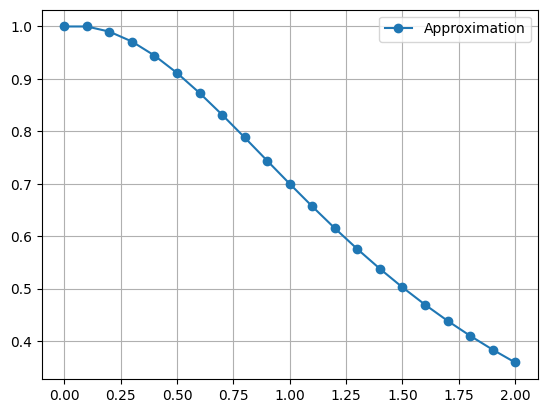

In [25]:
t0 = 0
tf = 2
y0 = 1
h = 0.1
y, t = be(y0, t0, tf, h)

plt.plot(t, y, 'o-', label='Approximation')
plt.legend()
plt.grid()

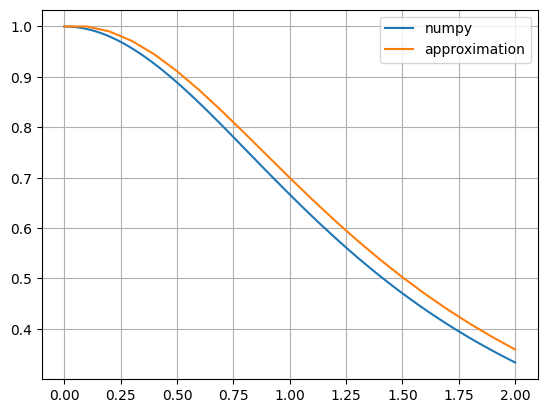

In [26]:
# Definisci l'equazione differenziale
def ode_func(t, y):
    return -t*y**2  # Ad esempio, consideriamo l'equazione y' = t * y

# Definisci le condizioni iniziali
t0 = 0  # Tempo iniziale
y0 = 1  # Valore iniziale di y(t0)

# Definisci l'intervallo di tempo in cui risolvere l'ODE
t_start = t0  # Inizio dell'intervallo di tempo
t_end = 2  # Fine dell'intervallo di tempo
num_points = 100  # Numero di punti di campionamento desiderati
t_span = np.linspace(t_start, t_end, num_points)

# Risolvi l'ODE con il passo di campionamento personalizzato
sol = scipy.integrate.solve_ivp(ode_func, [t_start, t_end], [y0], t_eval=t_span)

# Ottieni i risultati
t = sol.t  # Array dei tempi
y = sol.y[0]  # Array dei valori di y corrispondenti ai tempi

# Stampa i risultati
#for i in range(len(t)):
#    print(f"t: {t[i]}, y: {y[i]}")

ynostra, tnostra = be(y0, t0, tf, 0.1)
plt.plot(sol.t, sol.y[0], label= 'numpy')
plt.plot(tnostra, ynostra, label = 'approximation')
plt.legend()
plt.grid()

### Exact solution

Recall the ODE:
$$
y'= -ty^2 
$$

Let's solve algrebrically (separable variables DE):

$$
\frac{dy}{dt} = -ty^2
$$

$$
\frac{1}{y^2} \frac{dy}{dt} = -t
$$

$$
\frac{1}{y^2} dy = -t dt
$$

$$
\int{\frac{1}{y^2} dy} = \int{-t dt}
$$

$$
- \frac{1}{y} + C1 = -\frac{t^2}{2} + C2
$$

$$
\frac{1}{y} = \frac{t^2}{2} + C
$$

$$
y = \frac{1}{\frac{t^2}{2} + C}
$$

dato che deve essere $y(0) = 1$ allora $C = 1$:

$$
y(t) = \frac{1}{\frac{t^2}{2} + 1}
$$

Error: 0.12339200773274814


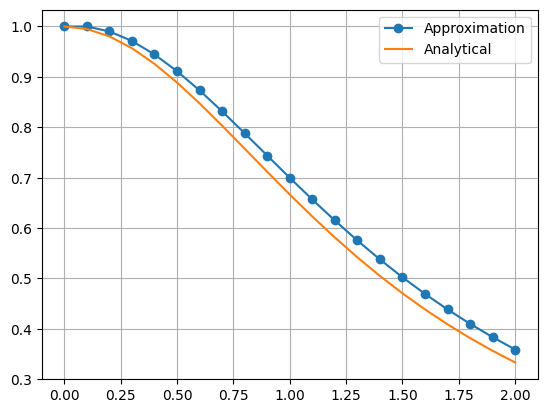

In [27]:
y, t = be(y0, t0, tf, h)

# analitycal solution
exact = lambda t: 1/(t**2/2+1)

plt.plot(t, y, 'o-', label='Approximation')
plt.plot(t, exact(t), label='Analytical')
plt.legend()
plt.grid()

error = np.linalg.norm(exact(t) - y, 2)
print('Error:', error)